In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os
import random 
import matplotlib.image as mpimg

In [18]:
print("Tensorflow version =",tf.__version__)
print("Pandas version =",pd.__version__)
print("Numpy version =",np.version.version)

Tensorflow version = 2.16.2
Pandas version = 2.2.2
Numpy version = 1.26.4


***Getting to know our Data***

In [19]:
def view_random_pic(target_dir,target_class):
    """Takes a target directory and a target class and displays random pictures"""
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    return img
    

['3484590.jpg']


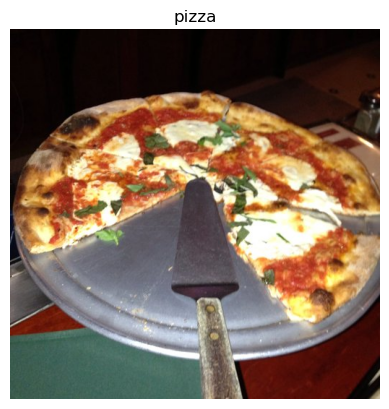

In [20]:
img = view_random_pic("/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/pizza_steak/train/","pizza")

**Getting Data ready**

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/pizza_steak/train"
test_dir = "/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(512,512),class_mode="binary",seed=42,shuffle=True)
test_data = test_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(512,512),class_mode="binary",seed=42,shuffle=True)
len(train_data),len(test_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(47, 16)

**Actually making the model**

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,activation='relu',input_shape=(512,512,3),padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(train_data,
                    epochs=20,
                    validation_data=test_data)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.5160 - val_loss: 0.6919
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.5570 - loss: 0.6887 - val_accuracy: 0.7000 - val_loss: 0.6604
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - accuracy: 0.7345 - loss: 0.6293 - val_accuracy: 0.8280 - val_loss: 0.4609
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.7927 - loss: 0.4735 - val_accuracy: 0.8380 - val_loss: 0.4081
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.8085 - loss: 0.4462 - val_accuracy: 0.8420 - val_loss: 0.3935
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.8047 - loss: 0.4310 - val_accuracy: 0.8500 - val_loss: 0.3875
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.8131 - loss: 0.4399 - val_accuracy: 0.8460 - val_loss: 0.3816
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.8418 - loss: 0.4054 - val_accu

In [35]:
model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8819 - loss: 0.3345


[0.3322294354438782, 0.878000020980835]

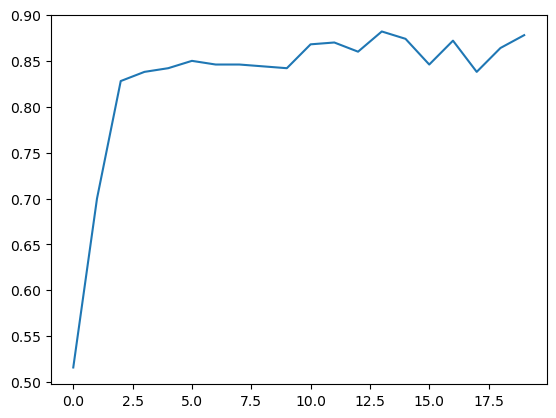

In [34]:
plt.plot(history.history['val_accuracy'])

In [40]:
model.save("CNN.keras")